In [1]:
from sklearn import model_selection
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal
from sklearn.model_selection import cross_val_score

# 1 Exploring the Data

In [2]:
digits = load_digits()
print(digits.keys())

data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [3]:
data.shape

(1797, 64)

### Size of the images
Each image consists of 8 x 8 digits, as shown for the first image in images.

In [4]:
image_example = images[0]
image_shape = images[0].shape

print(f"Example image: \n{image_example}")
print(f"\nShape of a single image: {image_shape}")

Example image: 
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

Shape of a single image: (8, 8)


## Visualize image of 3

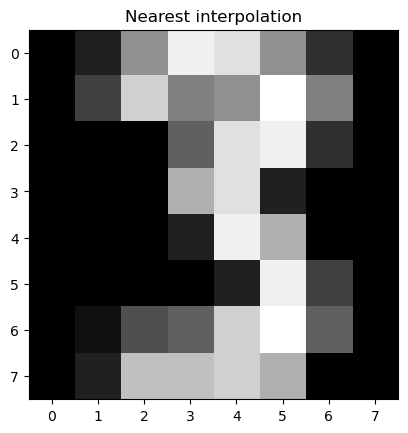

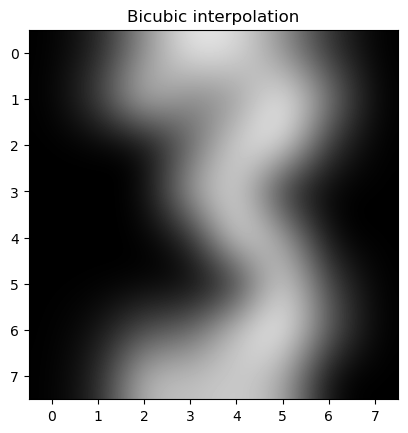

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a 3 image
img = images[13]

assert 2 == len(img.shape)

# Display the image with nearest interpolation
plt.figure()
plt.gray()
plt.imshow(img, interpolation="nearest")
plt.title("Nearest interpolation")
plt.show()

# Display the image with bicubic interpolation
plt.figure()
plt.gray()
plt.imshow(img, interpolation="bicubic")
plt.title("Bicubic interpolation")
plt.show()

## Filter 3 and 9 as well as generate Training and Test set

In [6]:
idx = (target == 3) | (target == 9)

print(idx)

[False False False ... False  True False]


In [7]:
data_cleaned = data[idx]
images_cleaned = images[idx]
target_cleaned = target[idx]

print(target_cleaned)
print(len(target_cleaned))

[3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3
 3 3 3 9 9 3 3 3 9 3 3 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9
 9 9 9 3 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9
 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3
 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3
 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3
 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9
 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 3 9 3 9 3 9 9 9 9 3 3
 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3
 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9]
363


In [8]:
# Get index of 3 and 9
idx_target_3 = (target_cleaned == 3)
idx_target_9 = (target_cleaned == 9)

In [9]:
X_all = images_cleaned
y_all = target_cleaned
X_train , X_test , y_train , y_test = model_selection.train_test_split( 
    X_all , y_all , test_size = 0.4 , random_state = 0
)

# Check if split was successful
print(len(X_all), len(y_all), len(X_train), len(X_test), len(y_train), len(y_test))

363 363 217 146 217 146


# 2 Hand-crafted classifier

## 2.1 Feature construction

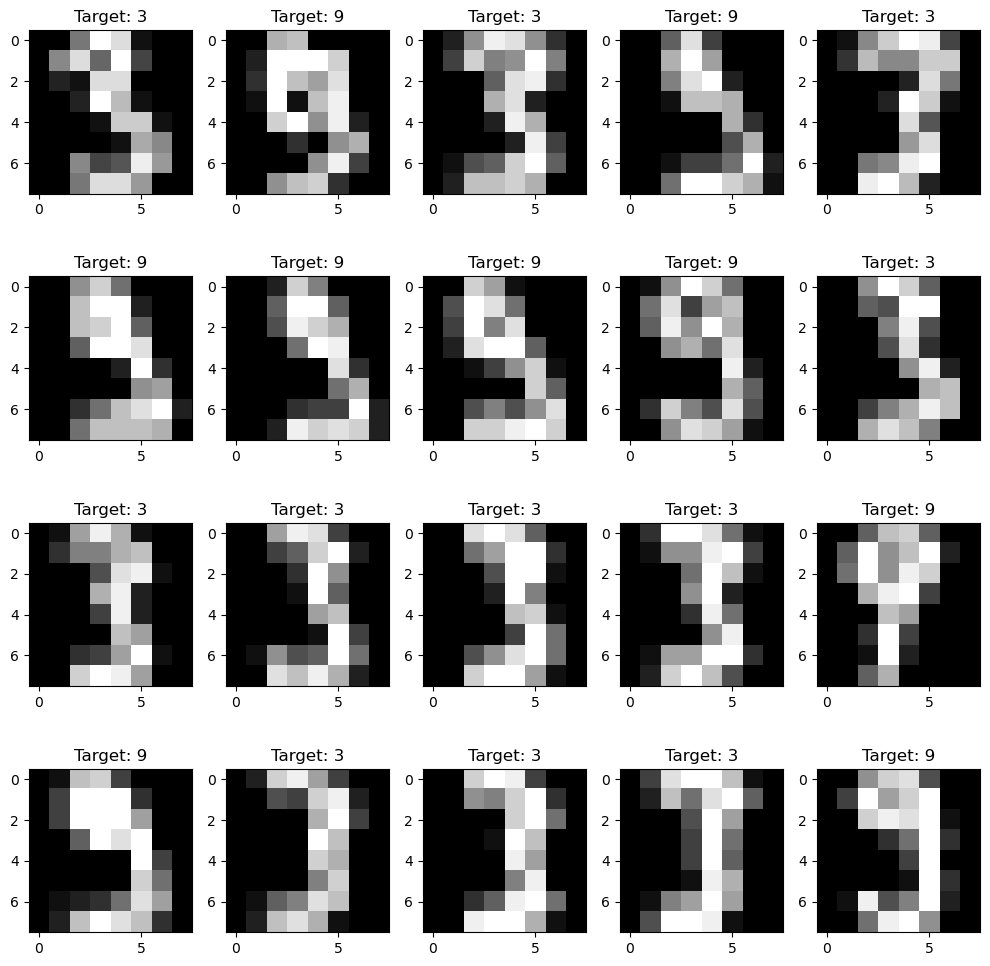

In [10]:
# First let's look at some 3s and 9s 
# Set up the subplots
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(10, 10))
axs = axs.flatten()

# Loop over the images
for i in range(20):
    img = images_cleaned[i]
    target = target_cleaned[i]
    assert 2 == len(img.shape)

    # Display the image with nearest interpolation
    axs[i].imshow(img, interpolation="nearest")
    axs[i].set_title(f"Target: {target}")

# Show the subplots
plt.tight_layout()
plt.show()

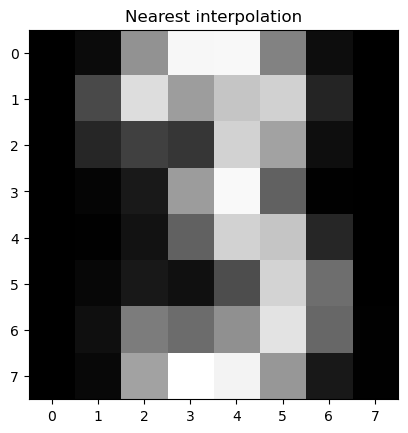

In [11]:
# average image of digit 3
image_sum = np.zeros((8, 8))
for image in images_cleaned[idx_target_3]: 
    image_sum += image
image_avg = image_sum / len(images_cleaned[idx_target_3])

# Generate a 3 image
img = image_avg

assert 2 == len(img.shape)

# Display the image with nearest interpolation
plt.figure()
plt.gray()
plt.imshow(img, interpolation="nearest")
plt.title("Nearest interpolation")
plt.show()

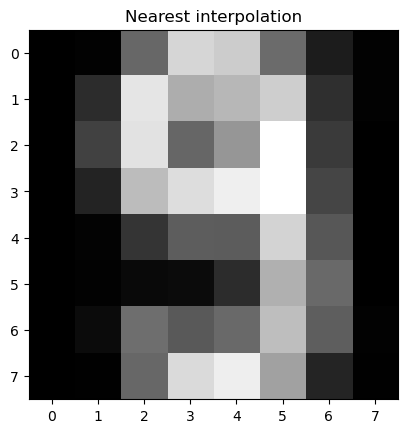

In [12]:
# average image of digit 9
image_sum = np.zeros((8, 8))
for image in images_cleaned[idx_target_9]: 
    image_sum += image
image_avg = image_sum / len(images_cleaned[idx_target_9])

# Generate a 9 image
img = image_avg

assert 2 == len(img.shape)

# Display the image with nearest interpolation
plt.figure()
plt.gray()
plt.imshow(img, interpolation="nearest")
plt.title("Nearest interpolation")
plt.show()

When comparing the two average images of 3s and 9s, it seems like the following pixels could be interesting features: 
- 3, 2: is very dark in the average 3 and quite bright in the average 9 
- 3, 5: is very dark in the average 3 and quite bright in the average 9 

In [33]:
def feature2d(x):
    """This function reduces a #instances x 64 matrix and returns #instances x 2 features.

    :param x: #instances x 64 matrix
    :type x: np.array
    :return: #instances x 2 features
    :rtype: np.array
    """

    features = []
    pixel_1 = (3, 2)
    pixel_2 = (3, 5)

    # Add selected pixels to feature lists
    for instance in x: 
        features.append([instance[pixel_1], instance[pixel_2]])

    return np.array(features)


In [35]:
features = feature2d(images_cleaned)

# Print some of the features
print(len(features))
print(features[:10])

363
[[ 2.  1.]
 [16. 15.]
 [ 0.  2.]
 [ 1. 11.]
 [ 0. 12.]
 [ 6. 14.]
 [ 0. 15.]
 [14.  6.]
 [ 9. 14.]
 [ 0.  3.]]


## 2.2 Scatterplot

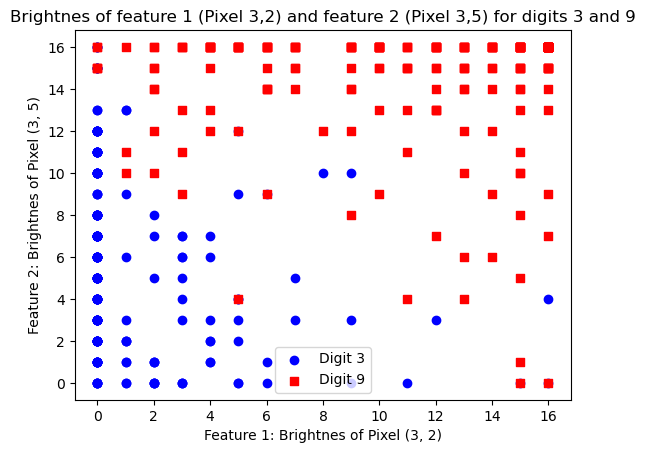

In [37]:
# Split up 2d feature list into two lists
features_1 = features[:, 0]
features_2 = features[:, 1]

# Generate a scatter plot with two different markers
plt.scatter(features_1[y_all==3], features_2[y_all==3], color='b', marker='o', label='Digit 3')
plt.scatter(features_1[y_all==9], features_2[y_all==9], color='r', marker='s', label='Digit 9')

# Add labels and legend
plt.xlabel('Feature 1: Brightnes of Pixel (3, 2)')
plt.ylabel('Feature 2: Brightnes of Pixel (3, 5)')
plt.title('Brightnes of feature 1 (Pixel 3,2) and feature 2 (Pixel 3,5) for digits 3 and 9')
plt.legend()

# Show the plot
plt.show()

## 2.3 Decision Rule 

In [39]:
# generate feature vectors for each class for the training set 
train_features = feature2d(X_train)
# Print some of the features
print(len(train_features))

# generate feature vectors for each class for the test set 
test_features = feature2d(X_test)
# Print some of the features
print(len(test_features))

217
146


In [54]:
test_features[0] - 0

array([ 3., 11.])

In [80]:
def nearest_mean(training_features, training_labels, test_features): 

    # get mean for training features and targets
    mean_train_features_target_3 = np.mean(training_features[training_labels==3], axis=0)
    mean_train_features_target_9 = np.mean(training_features[training_labels==9], axis=0)

    print("Mean for features 1 and 2:")
    print(mean_train_features_target_3)
    print(mean_train_features_target_9)

    # calculate decision boundary for each feature 
    decision_boundary = (mean_train_features_target_3 + mean_train_features_target_9) / 2
    print(f"Decision boundary (feature 1 and 2): {decision_boundary}")

    # calculate distance to decision boundary for both features 
    distance_to_decision_boundaries = test_features - decision_boundary

    # combine distances into one scalar per test feature
    distance_to_decision_boundary = distance_to_decision_boundaries[:,0] + distance_to_decision_boundaries[:,1]

    # prediction for combined distance to decision boundaries
    # negative scalar distance means, that both distances combined were closer to 3 mean value and otherwise to 9 mean value
    feature_1_digit_3_or_not = [3 if scalar_distance < 0 else 9 for scalar_distance in distance_to_decision_boundary]

    return feature_1_digit_3_or_not


In [92]:
test_prediciton = nearest_mean(
    train_features
    , y_train
    , test_features
)
print(test_prediciton[:10])
print(len(test_prediciton))

train_prediciton = nearest_mean(
    train_features
    , y_train
    , train_features
)
print(train_prediciton[:10])
print(len(train_prediciton))

Mean for features 1 and 2:
[1.45045045 5.58558559]
[ 9.99056604 13.95283019]
Decision boundary (feature 1 and 2): [5.72050824 9.76920789]
[3, 9, 9, 3, 3, 9, 9, 9, 3, 3]
146
Mean for features 1 and 2:
[1.45045045 5.58558559]
[ 9.99056604 13.95283019]
Decision boundary (feature 1 and 2): [5.72050824 9.76920789]
[9, 9, 9, 3, 9, 9, 3, 3, 9, 9]
217


In [93]:
# Now let's compare y_test and the predictions 
test_error = np.mean(test_prediciton != y_test) * 100
train_error = np.mean(train_prediciton != y_train) * 100

# print the errors
print(f"Test error: {test_error}%")
print(f"Training error: {train_error}%")

Test error: 6.164383561643835%
Training error: 5.529953917050691%


In [ ]:
# todo also generate training error 